In [1]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, Draw
from rdkit.Chem.Draw import IPythonConsole
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from keras.models import Model
from numpy.random import seed

Using TensorFlow backend.


In [3]:
mols = []
labels = []
with open("ch09_compounds.txt") as f:
    header = f.readline()
    smiles_index = -1
    for i, title in enumerate(header.split("\t")):
        if title == "CANONICAL_SMILES":
            smiles_index = i
        elif title == "STANDARD_VALUE":
            value_index = i
    for l in f:
        ls = l.split("\t")
        mol = Chem.MolFromSmiles(ls[smiles_index])
        mols.append(mol)
        val = float(ls[value_index])
        if val < 1000:
            labels.append([0,1]) # Positive
        else:
            labels.append([1,0]) # Negative
labels = np.array(labels)

In [4]:
nBits = 2048
fps = []
for mol in mols:
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=nBits)
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    fps.append(arr)
fps = np.array(fps)

In [6]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(fps, labels, random_state=794)

In [7]:
# Define DNN classifier model
epochs = 10
inputlayer1 = Input(shape=(nBits, ))
x1 = Dense(300, activation='relu')(inputlayer1)
x1 = Dropout(0.2)(x1)
x1 = Dense(300, activation='relu')(x1)
x1 = Dropout(0.2)(x1)
x1 = Dense(300, activation='relu')(x1)
output1 = Dense(2, activation='softmax')(x1)
model1 = Model(inputs=[inputlayer1], outputs=[output1])

In [8]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
hist1 = model1.fit(x_train1, y_train1, epochs=epochs)

Epoch 1/10
54/54 [==============================] - 0s 6ms/step - loss: 0.6882 - acc: 0.5926
Epoch 2/10
54/54 [==============================] - 0s 232us/step - loss: 0.5828 - acc: 0.6852
Epoch 3/10
54/54 [==============================] - 0s 265us/step - loss: 0.4836 - acc: 0.8704
Epoch 4/10
54/54 [==============================] - 0s 242us/step - loss: 0.3493 - acc: 0.9630
Epoch 5/10
54/54 [==============================] - 0s 254us/step - loss: 0.2190 - acc: 1.0000
Epoch 6/10
54/54 [==============================] - 0s 261us/step - loss: 0.1050 - acc: 1.0000
Epoch 7/10
54/54 [==============================] - 0s 253us/step - loss: 0.0484 - acc: 1.0000
Epoch 8/10
54/54 [==============================] - 0s 247us/step - loss: 0.0177 - acc: 1.0000
Epoch 9/10
54/54 [==============================] - 0s 250us/step - loss: 0.0059 - acc: 1.0000
Epoch 10/10
54/54 [==============================] - 0s 247us/step - loss: 0.0014 - acc: 1.0000


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

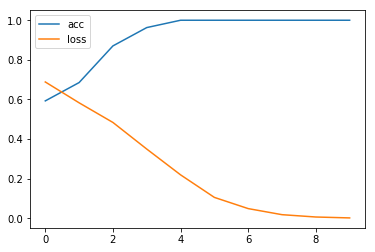

In [12]:
plt.plot(range(epochs), hist1.history['acc'], label='acc')
plt.legend()
plt.plot(range(epochs), hist1.history['loss'], label='loss')
plt.legend()

In [13]:
y_pred1 = model1.predict(x_test1)
y_pred_cls1 = np.argmax(y_pred1, axis=1)
y_test_cls1 =np.argmax(y_test1, axis=1)

In [14]:
confusion_matrix(y_test_cls1, y_pred_cls1)

array([[8, 5],
       [1, 5]])

In [16]:
from math import log10
from sklearn.metrics import r2_score
pIC50s = []
with open("ch09_compounds.txt") as f:
    header = f.readline()
    for i, title in enumerate(header.split("\t")):
        if title == "STANDARD_VALUE":
            value_index = i
    for l in f:
        ls = l.split("\t")
        val = float(ls[value_index])
        pIC50 = 9 - log10(val)
        pIC50s.append(pIC50)

pIC50s = np.array(pIC50s)
x_train2, x_test2, y_train2, y_test2 = train_test_split(fps, pIC50s, random_state=794)

In [17]:
epochs = 50
inputlayer2 = Input(shape=(nBits, ))
x2 = Dense(300, activation='relu')(inputlayer2)
x2 = Dropout(0.2)(x2)
x2 = Dense(300, activation='relu')(x2)
x2 = Dropout(0.2)(x2)
x2 = Dense(300, activation='relu')(x2)
output2 = Dense(1, activation='linear')(x2)
model2 = Model(inputs=[inputlayer2], outputs=[output2])

In [18]:
model2.compile(optimizer='adam', loss='mean_squared_error')

In [19]:
hist = model2.fit(x_train2, y_train2, epochs=epochs)

Epoch 1/50
54/54 [==============================] - 0s 6ms/step - loss: 31.4202
Epoch 2/50
54/54 [==============================] - 0s 244us/step - loss: 21.1735
Epoch 3/50
54/54 [==============================] - 0s 232us/step - loss: 9.4730
Epoch 4/50
54/54 [==============================] - 0s 241us/step - loss: 3.8113
Epoch 5/50
54/54 [==============================] - 0s 266us/step - loss: 7.1489
Epoch 6/50
54/54 [==============================] - 0s 248us/step - loss: 2.9365
Epoch 7/50
54/54 [==============================] - 0s 248us/step - loss: 0.8397
Epoch 8/50
54/54 [==============================] - 0s 253us/step - loss: 1.7766
Epoch 9/50
54/54 [==============================] - 0s 250us/step - loss: 2.3499
Epoch 10/50
54/54 [==============================] - 0s 241us/step - loss: 1.5721
Epoch 11/50
54/54 [==============================] - 0s 258us/step - loss: 0.6472
Epoch 12/50
54/54 [==============================] - 0s 242us/step - loss: 0.5966
Epoch 13/50
54/54 [======

In [20]:
y_pred2 = model2.predict(x_test2)

In [24]:
r2_score(y_test2, y_pred2)

-0.18252581622562003

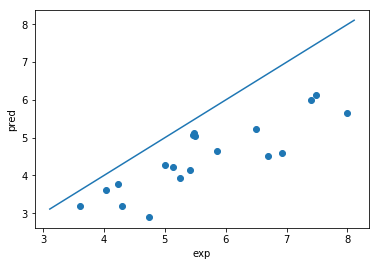

In [25]:
plt.scatter(y_test2, y_pred2)
plt.xlabel('exp')
plt.ylabel('pred')
plt.plot(np.arange(np.min(y_test2)-0.5, np.max(y_test2)+0.5), np.arange(np.min(y_test2)-0.5, np.max(y_test2)+0.5))